In [1]:
import numpy as np
import json
import pandas as pd
import json
import os
import os
import json


def remove_underline(x):
    return x.replace("_", "")

In [2]:
BASE_PATH = '/home/aiops/zhuty/tinyllama/scripts/fewshot_eval/outputs/'
commands = []
task_seed_prompts = {}
shot_num = 48
iter_name = "iter-380000-ckpt-step-47500_hf"

TASK_CLASS='obqa'

class_to_tasks_mapping = {"icl": ['agnews' ,'amazon' ,'dbpedia' ,'sst2' ,'tweet_hate' ,'tweet_offensive' ,'yelp' ],
                          "obqa": [ "squad", "nq_obqa", "tq_obqa" ,"hotpotqa"],
                          "cbqa": ["tq", "nq"]
                          }

class_to_seed_mapping = {"icl": range(42, 58),
                         "obqa": range(42, 46+1),
                         "cbqa": range(42, 46 + 1)
                         }

for task_name in  class_to_tasks_mapping[TASK_CLASS]:
    for model_name in ['cc']:
        # for seed_num in range(42, 46 + 1):
        for seed_num in class_to_seed_mapping[TASK_CLASS]:
            full_name = f"tiny_LLaMA_1b_8k_{model_name}_8k-{iter_name}"
            result_path = os.path.join(BASE_PATH,full_name, f'{task_name}_{shot_num}_{seed_num}_prompts_and_preds.json')
            if not os.path.exists(result_path):
                print(f"File {result_path} does not exist")
                curr = f""" sailctl job create eval1b{remove_underline(task_name)}{remove_underline(model_name)}{seed_num} -g 1  --debug --image asia-docker.pkg.dev/sail-tpu-02/git-insea-io/common/image_registry/liuqian/tinyllama:v9   --command-line-args  ' bash /home/aiops/zhuty/start.sh ; cd /home/aiops/zhuty/tinyllama/scripts/fewshot_eval/ ; bash single_task.sh /home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_8k_{model_name}_8k/{iter_name} {task_name} {seed_num} ' """
                commands.append(curr)

                continue
            else:
                print("Existing")
                curr_data = json.load(open(result_path, 'r'))
                curr_prompts = [x['prompt'] for x in curr_data['prompts']]
                task_seed_prompts[(task_name, seed_num)] = curr_prompts



Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing
Existing


In [3]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", use_fast=True, token = json.load(open("/home/aiops/zhuty/hf_token.json")))

In [ ]:

class_to_tasks_mapping = {"icl": ['agnews' ,'amazon' ,'dbpedia' ,'sst2' ,'tweet_hate' ,'tweet_offensive' ,'yelp' ],
                          "obqa": [ "squad", "nq_obqa", "tq_obqa" ,"hotpotqa"],
                          "cbqa": ["tq", "nq"]
                          }

class_to_seed_mapping = {"icl": range(42, 58),
                         "obqa": range(42, 46+1),
                         "cbqa": range(42, 46 + 1)
                         }

TASK_CLASS='obqa'
task_to_lengths = {}
for task_name in  class_to_tasks_mapping[TASK_CLASS]:
    task_lengths = []
    for seed_num in class_to_seed_mapping[TASK_CLASS]:
        tokenized = tokenizer(task_seed_prompts[(task_name, seed_num)])
        lengths = [len(x) for x in tokenized['input_ids']]
        task_lengths.extend(lengths)
    print(f"Task: {task_name}")
    task_to_lengths[task_name] = task_lengths



In [ ]:
for task_name, lengths in task_to_lengths.items():
    print(f"Task: {task_name}")
    print(f"Mean: {np.mean(lengths)}")
    print(f"Sd: {np.std(lengths)}")
    print(f"Median: {np.median(lengths)}")
    print(f"Max: {np.max(lengths)}")
    print(f"Min: {np.min(lengths)}")
    # percentiles
    print(f"Percentiles: {np.percentile(lengths, [25, 50, 75, 90, 95, 99])}")



In [39]:
tokenized = tokenizer(task_seed_prompts[('dbpedia', 53)])
lengths = [len(x) for x in tokenized['input_ids']]

KeyError: ('dbpedia', 53)

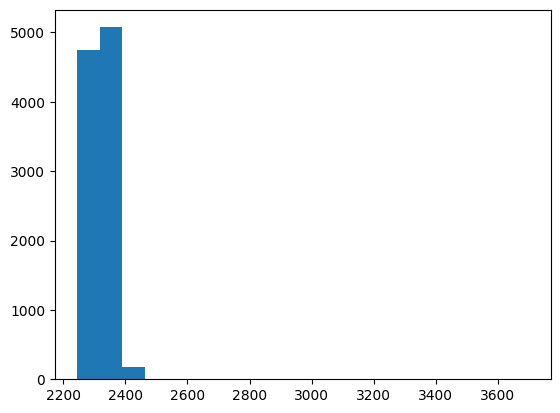

In [14]:
# Plot the distribution of lengths
import matplotlib.pyplot as plt
plt.hist(lengths, bins=20)
plt.show()

In [15]:
# get the statistics of the lengths
print(f"Mean: {np.mean(lengths)}")
print(f"Median: {np.median(lengths)}")
print(f"Max: {np.max(lengths)}")
print(f"Min: {np.min(lengths)}")
# percentiles
print(f"Percentiles: {np.percentile(lengths, [25, 50, 75, 90, 95, 99])}")


Mean: 2320.5496
Median: 2321.0
Max: 3699
Min: 2245
Percentiles: [2289. 2321. 2349. 2368. 2378. 2399.]


#### Ensure that the inputs are exactly the same for each input and seed across models

In [6]:
def compare_list_of_prompts(lst_of_prompts):
    # Check if all lists are identical
    all_identical = all(single_list == lst_of_prompts[0] for single_list in lst_of_prompts)

    # if all_identical:
    #     print("All lists are identical.")
    # else:
    #     print("Not all lists are identical.")
    return all_identical

In [7]:
BASE_PATH = '/home/aiops/zhuty/tinyllama/scripts/fewshot_eval/outputs/'
commands = []
data = []
shot_num = 24
iter_name = "iter-380000-ckpt-step-47500_hf"

TASK_CLASS="obqa"

class_to_tasks_mapping = {"icl": ['agnews' ,'amazon' ,'dbpedia' ,'sst2' ,'tweet_hate' ,'tweet_offensive' ,'yelp' ],
                          "obqa": [ "squad", "nq_obqa", "tq_obqa" ,"hotpotqa"],
                          "cbqa": ["tq", "nq"]
                          }

class_to_seed_mapping = {"icl": range(42, 58),
                         "obqa": range(42, 46+1),
                         "cbqa": range(42, 46 + 1)
                         }

for task_name in  class_to_tasks_mapping[TASK_CLASS]:
    for seed_num in class_to_seed_mapping[TASK_CLASS]:
        prompts = []
        for model_name in ['cc', 'cc_merged_v1', 'cc_merged_v2']:
        # for seed_num in range(42, 46 + 1):
            full_name = f"tiny_LLaMA_1b_8k_{model_name}_8k-{iter_name}"
            result_path = os.path.join(BASE_PATH,full_name, f'{task_name}_{shot_num}_{seed_num}_prompts_and_preds.json')
            curr_data = json.load(open(result_path))
            # print(curr_data.keys())
            prompts.append([x['prompt'] for x in curr_data['prompts']])

        # ensure that the prompts are the same
        all_identical = compare_list_of_prompts(prompts)
        assert all_identical, f"Not identical inputs! {task_name} {seed_num}"



FileNotFoundError: [Errno 2] No such file or directory: '/home/aiops/zhuty/tinyllama/scripts/fewshot_eval/outputs/tiny_LLaMA_1b_8k_cc_8k-iter-380000-ckpt-step-47500_hf/squad_24_42_prompts_and_preds.json'